Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0      

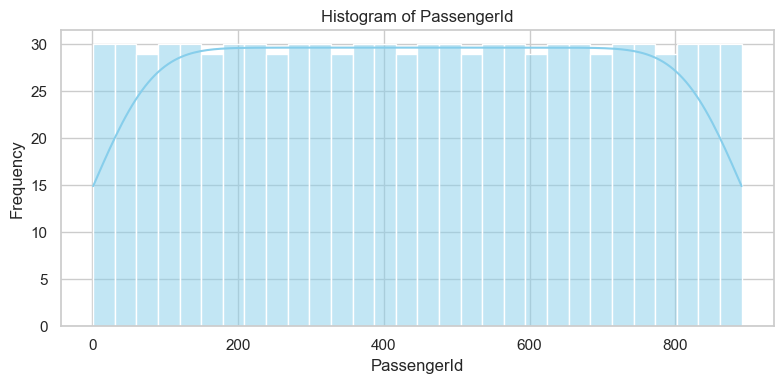

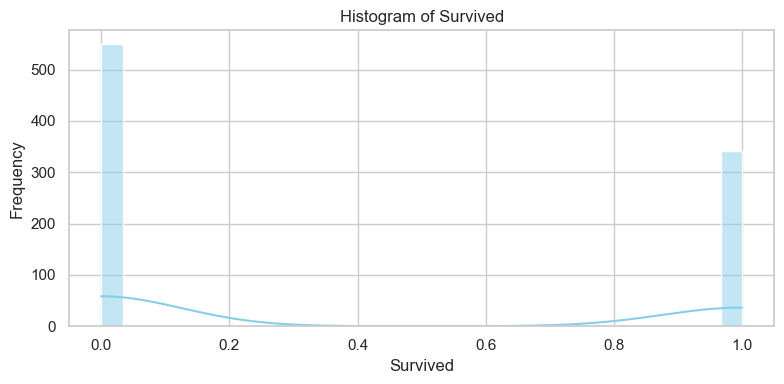

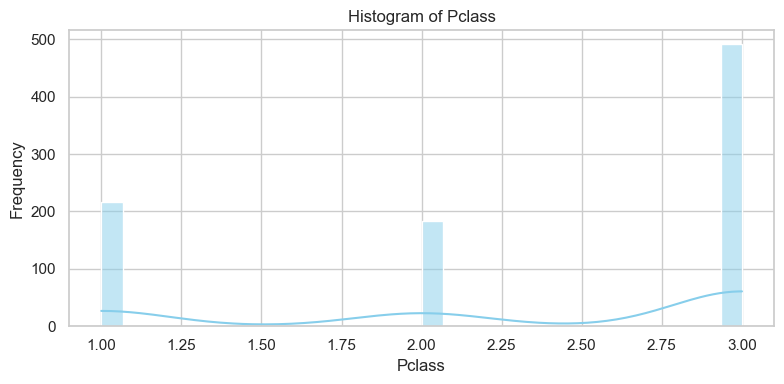

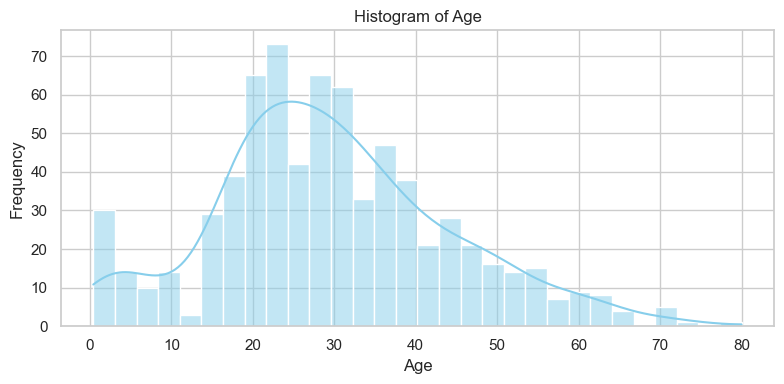

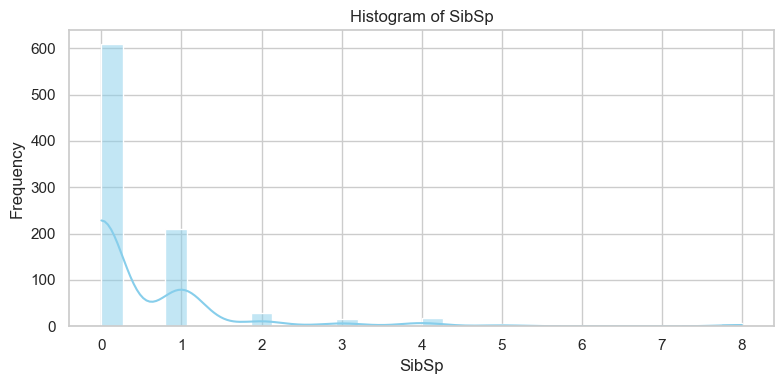

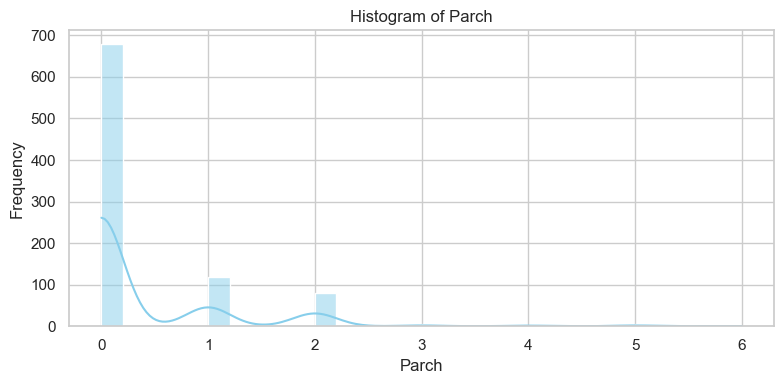

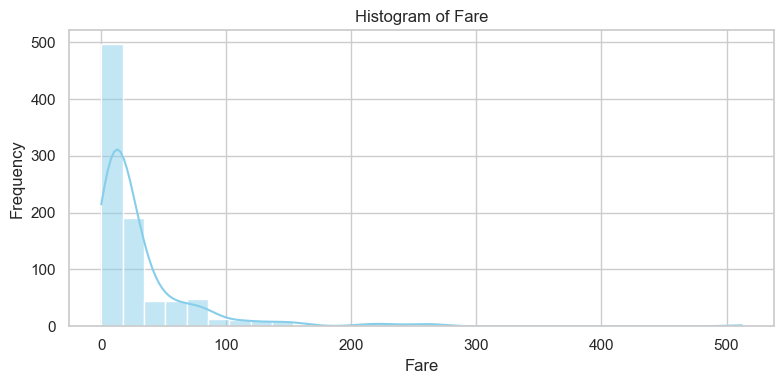

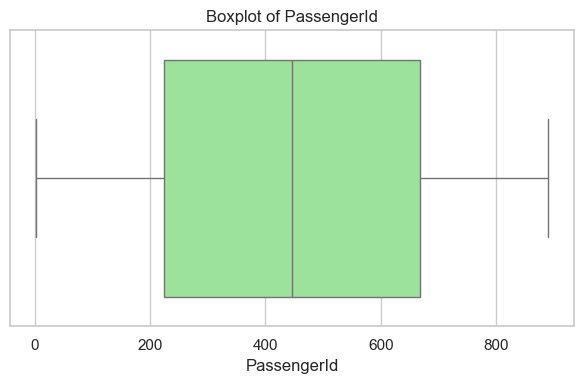

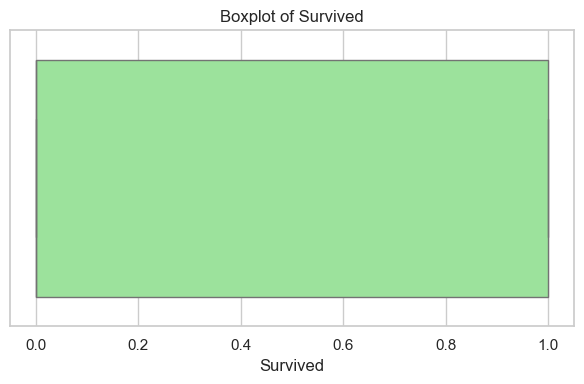

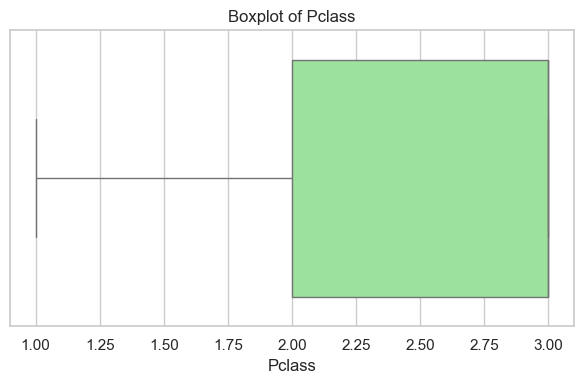

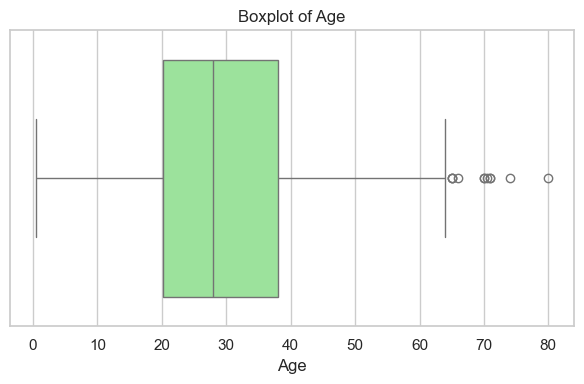

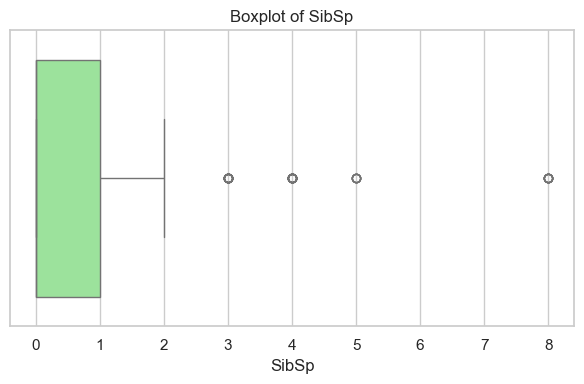

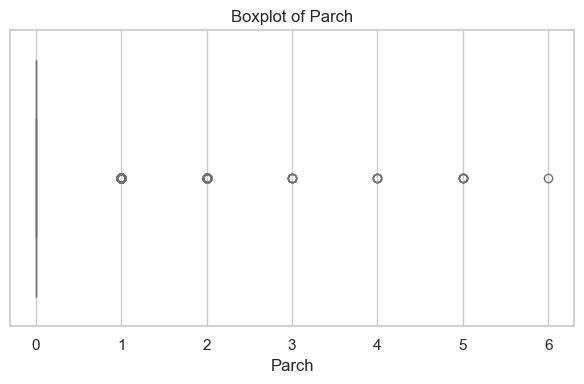

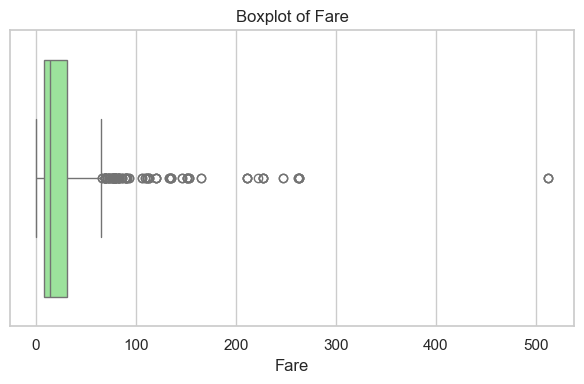

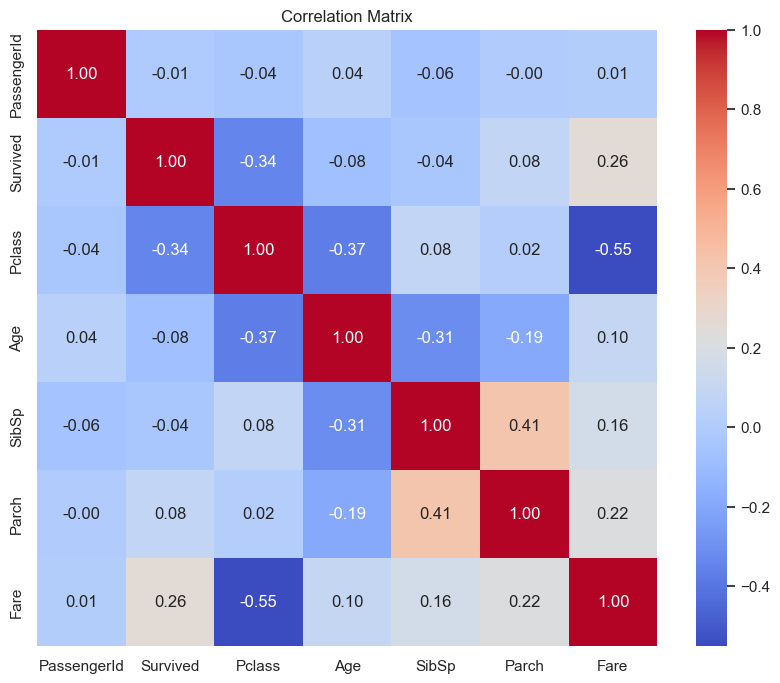


Skewness of Numeric Features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


C:\Users\duddu\AppData\Local\Temp\ipykernel_28872\582910919.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


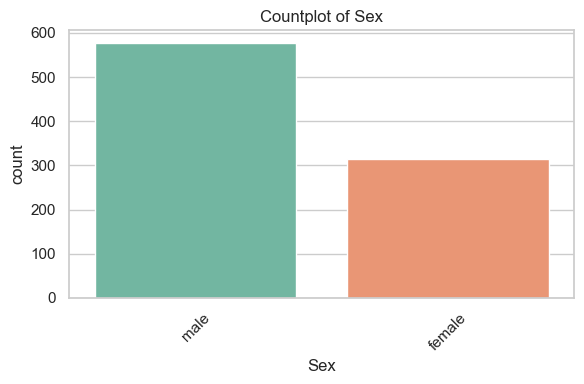

C:\Users\duddu\AppData\Local\Temp\ipykernel_28872\582910919.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


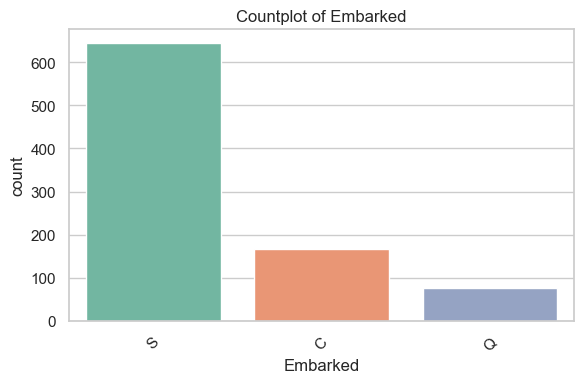

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up styles
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-muted")

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 1. Summary Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# 2. Histograms for numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 3. Boxplots for numeric features
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col].dropna(), color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# 4. Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 5. Pairplot (optional, if not too many features)
if len(numeric_cols) <= 6:
    sns.pairplot(df[numeric_cols].dropna())
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

# 6. Skewness
print("\nSkewness of Numeric Features:")
print(df[numeric_cols].skew())

# 7. Countplots for common categorical features
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].nunique() < 10:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f"Countplot of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
